# Training of CoAtNet Multi-modal Neural Network

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import yaml
import librosa
import librosa.display
import soundfile as sf
import shutil
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(device)
import warnings
import librosa

# Suppress specific warnings from librosa regarding depreciation
warnings.filterwarnings("ignore", category=FutureWarning)

cuda


In [2]:
# Import Modal-specific scripts
from coat_w_fusion import \
    coatnet_mm_train, coatnet_mm_infer, CoAtNet_multimodal

## Start Training

In [3]:
audio_dir = '../preprocessed_data/'
tabular_file = '../preprocessed_data/keyboard_tabular_data.pkl'
model_path = '../models/model.pt'

if not os.path.exists('../models/'):
        os.makedirs('../models/')


last_model, train_loss, val_loss = coatnet_mm_train.train(audio_dir=audio_dir,
        tabular_pkl_file=tabular_file,
        model_path=model_path,
        num_classes=48,
        batch_size=16,
        split_size=0.2,
        epochs=5)

/home/mreag/miniconda3/envs/aaml/lib/python3.10/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Validation Accuracy: 0.029891304347826088
Epoch [1/5] || Train Loss: 3.9091 || Val Loss: 3.7703
Validation Accuracy: 0.03260869565217391
Epoch [2/5] || Train Loss: 3.8281 || Val Loss: 3.8190
Validation Accuracy: 0.02717391304347826
Epoch [3/5] || Train Loss: 3.8390 || Val Loss: 3.7204
Validation Accuracy: 0.016304347826086956
Epoch [4/5] || Train Loss: 3.8266 || Val Loss: 3.5976
Validation Accuracy: 0.04619565217391304
Epoch [5/5] || Train Loss: 3.6392 || Val Loss: 3.6346


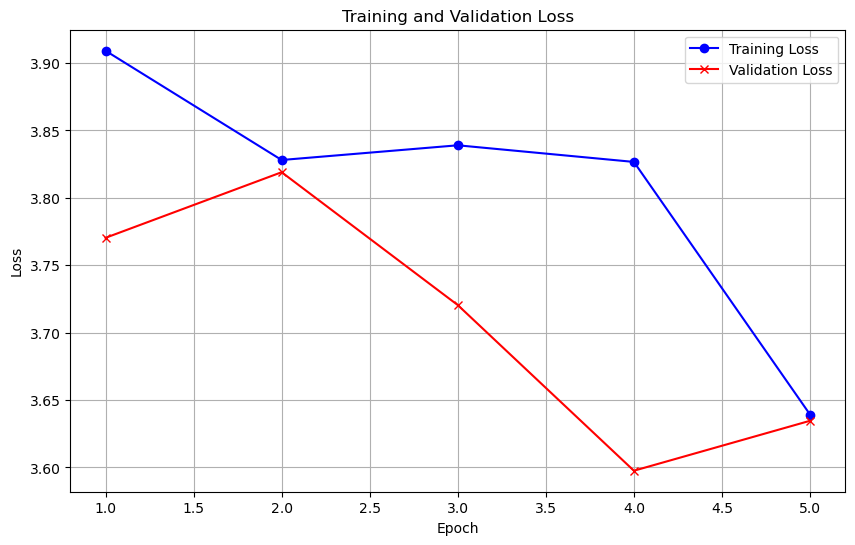

In [4]:
def plot_losses(training_losses, validation_losses, epochs):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_losses, label='Training Loss', color='blue', marker='o')
    plt.plot(epochs, validation_losses, label='Validation Loss', color='red', marker='x')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_losses(training_losses=train_loss,
            validation_losses=val_loss,
            epochs=list(range(1, len(train_loss) + 1)))